# Introduction to Regression with Neural Networks in TensorFlow
There are many definition for a regression problem, this is simplified defintion: predicting a numerical variable based on some other combination of variables, even shorter.. predicting a number


In [1]:
# Import Tensorflow
import tensorflow as tf
print(tf.__version__)

2.13.0


##  Creating a data to view and fit

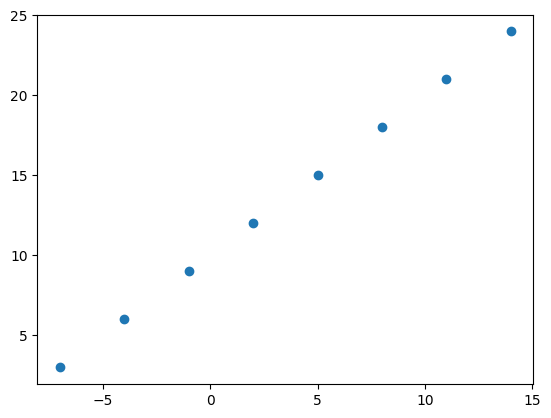

In [3]:
import numpy as np
import matplotlib.pyplot as plt

# create features
X = np.array([-7.0, -4.0 , -1.0, 2.0 , 5.0, 8.0, 11.0, 14.0])

# create labels
y = np.array([3.0, 6.0, 9.0, 12.0, 15.0, 18.0, 21.0, 24.0])

# visualze it
plt.scatter(X,y);

## Input and output shapes

In [4]:
# Create a demo tensor for housing price prediction problem
house_info= tf.constant(["bedroom", "bathroom", "garage"])
house_price= tf.constant([939700])
house_info, house_price

(<tf.Tensor: shape=(3,), dtype=string, numpy=array([b'bedroom', b'bathroom', b'garage'], dtype=object)>,
 <tf.Tensor: shape=(1,), dtype=int32, numpy=array([939700], dtype=int32)>)

In [5]:
input_shape= X.shape
output_shape = y.shape
input_shape, output_shape

((8,), (8,))

In [6]:
# Turn our NumPy arrays in tensors
X = tf.cast(tf.constant(X), dtype=tf.float32)
y = tf.cast(tf.constant(y), dtype=tf.float32)
X, y

(<tf.Tensor: shape=(8,), dtype=float32, numpy=array([-7., -4., -1.,  2.,  5.,  8., 11., 14.], dtype=float32)>,
 <tf.Tensor: shape=(8,), dtype=float32, numpy=array([ 3.,  6.,  9., 12., 15., 18., 21., 24.], dtype=float32)>)

In [7]:
input_shape= X[0].shape
output_shape = y[0].shape
input_shape, output_shape

(TensorShape([]), TensorShape([]))

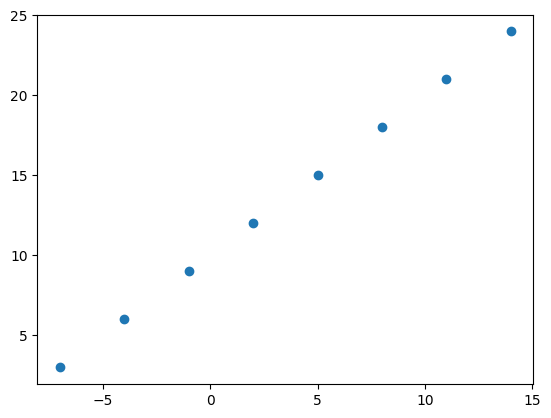

In [8]:
plt.scatter(X, y)

## Steps in modelling with TensorFlow

1. **Creating a model** - define the input and output layers, as well as the hidden layers of a deep learning model.

2. **Compiling the model** - define the loss function (in other words, the function which tells our model how wrong it is) and the optimizer (tells our model how to improve the patterns its learning) and evaluation metrics (what we can use to interpret the performance of our model).

3. **Fitting a model** - letting the model try to find patterns between X and y (features and labels)


In [9]:
# set random seed
tf.random.set_seed(42)

# 1. create a model using the Sequential API
model =  tf.keras.Sequential([tf.keras.layers.Dense(1)])


# 2. Complile the model
model.compile(loss= tf.keras.losses.mae, #mae is mean absolute error mean(ytrue-ypred)
              optimizer=tf.keras.optimizers.SGD(), #SGD is stochastic gradient descent
              metrics=["mae"])

# 3. Fit the model
model.fit(tf.expand_dims(X, axis=-1), y, epochs=100)

Epoch 1/100
1/1 [==============================] - 1s 600ms/step - loss: 20.5659 - mae: 20.5659
Epoch 2/100
1/1 [==============================] - 0s 12ms/step - loss: 20.2847 - mae: 20.2847
Epoch 3/100
1/1 [==============================] - 0s 20ms/step - loss: 20.0034 - mae: 20.0034
Epoch 4/100
1/1 [==============================] - 0s 12ms/step - loss: 19.7222 - mae: 19.7222
Epoch 5/100
1/1 [==============================] - 0s 12ms/step - loss: 19.4409 - mae: 19.4409
Epoch 6/100
1/1 [==============================] - 0s 13ms/step - loss: 19.1597 - mae: 19.1597
Epoch 7/100
1/1 [==============================] - 0s 14ms/step - loss: 18.8784 - mae: 18.8784
Epoch 8/100
1/1 [==============================] - 0s 11ms/step - loss: 18.5972 - mae: 18.5972
Epoch 9/100
1/1 [==============================] - 0s 14ms/step - loss: 18.3159 - mae: 18.3159
Epoch 10/100
1/1 [==============================] - 0s 12ms/step - loss: 18.0347 - mae: 18.0347
Epoch 11/100
1/1 [==============================

In [10]:
# Check out X and y
X,y

(<tf.Tensor: shape=(8,), dtype=float32, numpy=array([-7., -4., -1.,  2.,  5.,  8., 11., 14.], dtype=float32)>,
 <tf.Tensor: shape=(8,), dtype=float32, numpy=array([ 3.,  6.,  9., 12., 15., 18., 21., 24.], dtype=float32)>)

In [11]:
# try and make prediction
y_pred = model.predict([17.0])
y_pred

1/1 [==============================] - 0s 124ms/step


array([[29.436268]], dtype=float32)

In [12]:
y_pred + 9.77

array([[39.20627]], dtype=float32)

## Improving our model

we can improve our model, by altering the steps we took to create a model.

1. **Creating a model** - here we might add more layers, increase the number of hidden units(all called neurons) within each of the hidden layers, change the activation function of each layer.

2. **Compiling a model** - here we might change the optimization function or perhaps the **learning rate** of the optimization function.

3. **Fitting a model** - here we might fit a model for more **epochs** (leave it training for longer) or on more data (give the model more examples to learn from).



In [13]:
# improving model

# 1. create a model(specified to problem)
model = tf.keras.Sequential([tf.keras.layers.Dense(100, activation="relu"),
                            tf.keras.layers.Dense(1)])

# 2. compile the model
model.compile(loss=tf.keras.losses.mae,
              optimizer=tf.keras.optimizers.SGD(),
              metrics=["mae"])

# 3. fit the model
model.fit(tf.expand_dims(X, axis=-1), y, epochs=100)

Epoch 1/100
1/1 [==============================] - 1s 509ms/step - loss: 13.8761 - mae: 13.8761
Epoch 2/100
1/1 [==============================] - 0s 13ms/step - loss: 13.3250 - mae: 13.3250
Epoch 3/100
1/1 [==============================] - 0s 19ms/step - loss: 12.7830 - mae: 12.7830
Epoch 4/100
1/1 [==============================] - 0s 21ms/step - loss: 12.2417 - mae: 12.2417
Epoch 5/100
1/1 [==============================] - 0s 15ms/step - loss: 11.6955 - mae: 11.6955
Epoch 6/100
1/1 [==============================] - 0s 15ms/step - loss: 11.1331 - mae: 11.1331
Epoch 7/100
1/1 [==============================] - 0s 13ms/step - loss: 10.5530 - mae: 10.5530
Epoch 8/100
1/1 [==============================] - 0s 13ms/step - loss: 9.9500 - mae: 9.9500
Epoch 9/100
1/1 [==============================] - 0s 13ms/step - loss: 9.3306 - mae: 9.3306
Epoch 10/100
1/1 [==============================] - 0s 12ms/step - loss: 8.6875 - mae: 8.6875
Epoch 11/100
1/1 [==============================] - 0s

In [14]:
# checking X and y
X, y

(<tf.Tensor: shape=(8,), dtype=float32, numpy=array([-7., -4., -1.,  2.,  5.,  8., 11., 14.], dtype=float32)>,
 <tf.Tensor: shape=(8,), dtype=float32, numpy=array([ 3.,  6.,  9., 12., 15., 18., 21., 24.], dtype=float32)>)

In [15]:
model.predict([17.0]) #overfiting example

1/1 [==============================] - 0s 84ms/step


array([[32.356873]], dtype=float32)

In [16]:
# try again improving model
model = tf.keras.Sequential([tf.keras.layers.Dense(100),
                            tf.keras.layers.Dense(100),
                            tf.keras.layers.Dense(1)])

model.compile(loss =["mae"],
              optimizer= tf.keras.optimizers.legacy.Adam(learning_rate=0.01),
              metrics=["mae"])

model.fit(tf.expand_dims( X , axis=-1),y, epochs=100)


Epoch 1/100
1/1 [==============================] - 1s 580ms/step - loss: 12.9851 - mae: 12.9851
Epoch 2/100
1/1 [==============================] - 0s 14ms/step - loss: 7.5736 - mae: 7.5736
Epoch 3/100
1/1 [==============================] - 0s 20ms/step - loss: 13.4857 - mae: 13.4857
Epoch 4/100
1/1 [==============================] - 0s 17ms/step - loss: 12.0064 - mae: 12.0064
Epoch 5/100
1/1 [==============================] - 0s 14ms/step - loss: 8.3740 - mae: 8.3740
Epoch 6/100
1/1 [==============================] - 0s 17ms/step - loss: 7.3989 - mae: 7.3989
Epoch 7/100
1/1 [==============================] - 0s 19ms/step - loss: 8.6334 - mae: 8.6334
Epoch 8/100
1/1 [==============================] - 0s 16ms/step - loss: 8.9891 - mae: 8.9891
Epoch 9/100
1/1 [==============================] - 0s 14ms/step - loss: 8.7591 - mae: 8.7591
Epoch 10/100
1/1 [==============================] - 0s 13ms/step - loss: 8.0892 - mae: 8.0892
Epoch 11/100
1/1 [==============================] - 0s 14ms/st

In [17]:
model.predict([17.0])

1/1 [==============================] - 0s 92ms/step


array([[26.502573]], dtype=float32)

In [18]:
X,y

(<tf.Tensor: shape=(8,), dtype=float32, numpy=array([-7., -4., -1.,  2.,  5.,  8., 11., 14.], dtype=float32)>,
 <tf.Tensor: shape=(8,), dtype=float32, numpy=array([ 3.,  6.,  9., 12., 15., 18., 21., 24.], dtype=float32)>)

In [19]:
model.predict([20])

1/1 [==============================] - 0s 97ms/step


array([[29.457747]], dtype=float32)

## Evaluating the model

In practice, a typical workflow to go through when building a neural network is :

`Build a model -> fit it -> evaluate it -> tweak a model-> fit it-> evaluate it -> tweak a model -> fit it->evaluate it...`

When it comes to evaluation... there are 3 words to memorize:

> "Visualize, visualize, visualize"

It's good idea to visualize
 * The data - what data are we working with? what does it look like?
 * The model itself - what does our model look like?
 * The training of a model - how does a model perform when it learns?
 * The predictions of the model - how do the predictions of a model line up against the ground truth(the original labels)?

In [20]:
# Make a bigger dataset
X = tf.range(-100, 100, 4)
X

<tf.Tensor: shape=(50,), dtype=int32, numpy=
array([-100,  -96,  -92,  -88,  -84,  -80,  -76,  -72,  -68,  -64,  -60,
        -56,  -52,  -48,  -44,  -40,  -36,  -32,  -28,  -24,  -20,  -16,
        -12,   -8,   -4,    0,    4,    8,   12,   16,   20,   24,   28,
         32,   36,   40,   44,   48,   52,   56,   60,   64,   68,   72,
         76,   80,   84,   88,   92,   96], dtype=int32)>

In [21]:
# make labels for the dataset
y = X +10
y

<tf.Tensor: shape=(50,), dtype=int32, numpy=
array([-90, -86, -82, -78, -74, -70, -66, -62, -58, -54, -50, -46, -42,
       -38, -34, -30, -26, -22, -18, -14, -10,  -6,  -2,   2,   6,  10,
        14,  18,  22,  26,  30,  34,  38,  42,  46,  50,  54,  58,  62,
        66,  70,  74,  78,  82,  86,  90,  94,  98, 102, 106], dtype=int32)>

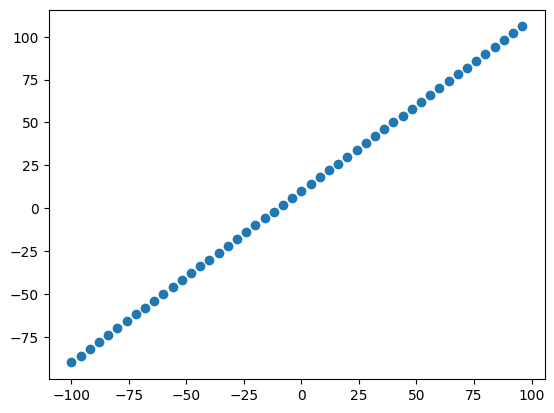

In [22]:
# visualize the data
plt.scatter(X , y )

## The 3 sets

* Training set - the model learns from this data, which is typically 70 - 80% of the total data you have available.
* Validation set - the model gets tuned on this data, which is typically 10-15% of the data available.
* Test set - the model gets evaluated on this data to test what it has learned , this set is typically 10-15% of the total data available.

In [23]:
# check the length of how many samples we have
len(X)

50

In [24]:
# split the data into train and test sets
X_train = X[:40] # first 40 are training samples (80% of thr data)
X_test = X[40:] # remaining 20% of the data

y_train= y[:40] # first 40 i.e. 80% of data
y_test= y[40:] # last 40 i.e. 20% of data

len(X_train), len(X_test), len(y_test), len(y_train)

(40, 10, 10, 40)

## Visualizing the data

Now we've got our training and test sets.. let's visualize again

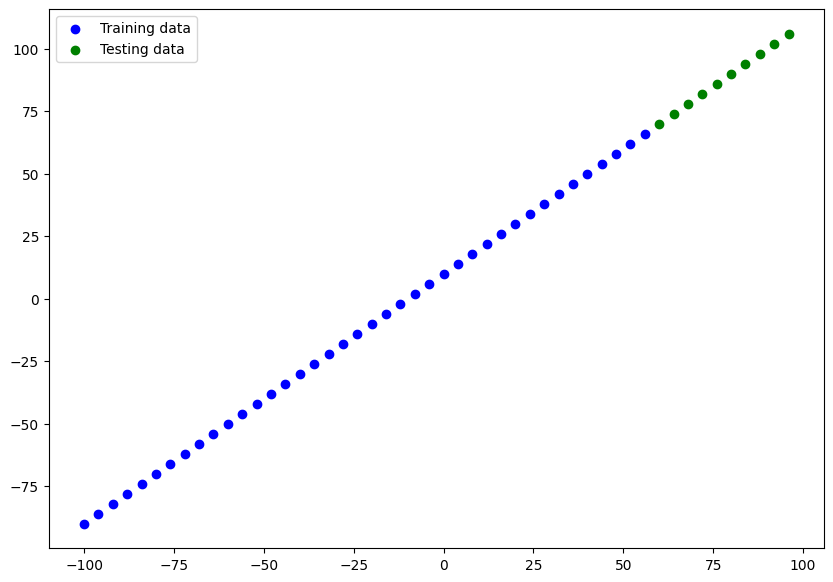

In [27]:
plt.figure(figsize=(10,7))
# plot training data in blue
plt.scatter(X_train, y_train, c="b", label="Training data")
# plot testing data
plt.scatter(X_test, y_test, c="g", label ="Testing data")
# show legends
plt.legend()

In [32]:
# Let's create Neural network

# 1. Create a Neural Network
model = tf.keras.Sequential([tf.keras.layers.Dense(1)])

# 2. compile the model
model.compile(loss = ["mae"],
              optimizer=tf.keras.optimizers.SGD(),
              metrics="mae")

# 3. fit the model
model.fit(tf.expand_dims(X_train, axis =-1),y_train , epochs=100)

Epoch 1/100
2/2 [==============================] - 0s 9ms/step - loss: 81.9103 - mae: 81.9103
Epoch 2/100
2/2 [==============================] - 0s 9ms/step - loss: 46.5128 - mae: 46.5128
Epoch 3/100
2/2 [==============================] - 0s 8ms/step - loss: 12.8777 - mae: 12.8777
Epoch 4/100
2/2 [==============================] - 0s 12ms/step - loss: 8.0069 - mae: 8.0069
Epoch 5/100
2/2 [==============================] - 0s 9ms/step - loss: 12.8607 - mae: 12.8607
Epoch 6/100
2/2 [==============================] - 0s 9ms/step - loss: 7.9097 - mae: 7.9097
Epoch 7/100
2/2 [==============================] - 0s 9ms/step - loss: 12.0654 - mae: 12.0654
Epoch 8/100
2/2 [==============================] - 0s 8ms/step - loss: 7.5569 - mae: 7.5569
Epoch 9/100
2/2 [==============================] - 0s 11ms/step - loss: 7.5315 - mae: 7.5315
Epoch 10/100
2/2 [==============================] - 0s 7ms/step - loss: 12.6124 - mae: 12.6124
Epoch 11/100
2/2 [==============================] - 0s 7ms/step -

In [33]:
# visualize the model
model.summary()

Model: "sequential_6"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_9 (Dense)             (None, 1)                 2         
                                                                 
Total params: 2 (8.00 Byte)
Trainable params: 2 (8.00 Byte)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [34]:
model.build()

In [35]:
X =tf.range(-100, 200,4)
y = X+10
X,y

(<tf.Tensor: shape=(75,), dtype=int32, numpy=
 array([-100,  -96,  -92,  -88,  -84,  -80,  -76,  -72,  -68,  -64,  -60,
         -56,  -52,  -48,  -44,  -40,  -36,  -32,  -28,  -24,  -20,  -16,
         -12,   -8,   -4,    0,    4,    8,   12,   16,   20,   24,   28,
          32,   36,   40,   44,   48,   52,   56,   60,   64,   68,   72,
          76,   80,   84,   88,   92,   96,  100,  104,  108,  112,  116,
         120,  124,  128,  132,  136,  140,  144,  148,  152,  156,  160,
         164,  168,  172,  176,  180,  184,  188,  192,  196], dtype=int32)>,
 <tf.Tensor: shape=(75,), dtype=int32, numpy=
 array([-90, -86, -82, -78, -74, -70, -66, -62, -58, -54, -50, -46, -42,
        -38, -34, -30, -26, -22, -18, -14, -10,  -6,  -2,   2,   6,  10,
         14,  18,  22,  26,  30,  34,  38,  42,  46,  50,  54,  58,  62,
         66,  70,  74,  78,  82,  86,  90,  94,  98, 102, 106, 110, 114,
        118, 122, 126, 130, 134, 138, 142, 146, 150, 154, 158, 162, 166,
        170, 174, 178

In [39]:
# creating a model which builds automatically by defining the input_shape argument in the first layer
tf.random.set_seed(42)

# Create a model(same as above)
model= tf.keras.Sequential([tf.keras.layers.Dense(100, input_shape=[1], name="input_layer"),
                            tf.keras.layers.Dense(1, name="out_layer")], name="model1")

# compile the model(same as above)
model.compile(loss = tf.keras.losses.mae,
              optimizer = tf.keras.optimizers.legacy.Adam(learning_rate=0.01),
              metrics=["mae"])
# fit the model

In [37]:
model.summary()

Model: "model1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_layer (Dense)         (None, 100)               200       
                                                                 
 out_layer (Dense)           (None, 1)                 101       
                                                                 
Total params: 301 (1.18 KB)
Trainable params: 301 (1.18 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


* Total params - total number of parameter of model
* Trainable parameters - these are the parameters(patterns) the model can update as it trains
* Non- trainable params - these parameters aren't updated during training (this is typical when you bring parameters from the other models during **transfer learning**)

In [42]:
model.fit(tf.expand_dims(X_train, axis =-1),y_train , epochs=100, verbose=1)

Epoch 1/100
2/2 [==============================] - 0s 8ms/step - loss: 30.8274 - mae: 30.8274
Epoch 2/100
2/2 [==============================] - 0s 7ms/step - loss: 12.5650 - mae: 12.5650
Epoch 3/100
2/2 [==============================] - 0s 8ms/step - loss: 10.8385 - mae: 10.8385
Epoch 4/100
2/2 [==============================] - 0s 8ms/step - loss: 11.4897 - mae: 11.4897
Epoch 5/100
2/2 [==============================] - 0s 9ms/step - loss: 9.8419 - mae: 9.8419
Epoch 6/100
2/2 [==============================] - 0s 10ms/step - loss: 7.1655 - mae: 7.1655
Epoch 7/100
2/2 [==============================] - 0s 9ms/step - loss: 8.0719 - mae: 8.0719
Epoch 8/100
2/2 [==============================] - 0s 9ms/step - loss: 7.0461 - mae: 7.0461
Epoch 9/100
2/2 [==============================] - 0s 8ms/step - loss: 7.3238 - mae: 7.3238
Epoch 10/100
2/2 [==============================] - 0s 8ms/step - loss: 8.1084 - mae: 8.1084
Epoch 11/100
2/2 [==============================] - 0s 8ms/step - loss

In [43]:
# get summary of model
model.summary()

Model: "model1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_layer (Dense)         (None, 100)               200       
                                                                 
 out_layer (Dense)           (None, 1)                 101       
                                                                 
Total params: 301 (1.18 KB)
Trainable params: 301 (1.18 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


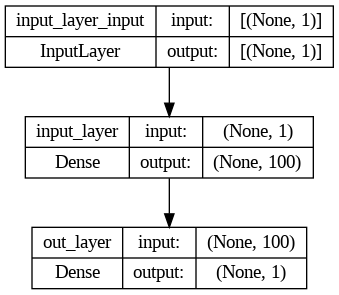

In [44]:
from tensorflow.keras.utils import plot_model

plot_model(model=model, show_shapes=True)


### Visualizing our model's prediction

To visualize predictions, it's a good idea to plot them against the ground truth labels.

Often you'll see in the form of `y_test` or `y_true` versus `y_pred`(ground truth versus your model's predictions).


In [45]:
# make some predictions
y_pred =model.predict(X_test)
y_pred

1/1 [==============================] - 0s 59ms/step


array([[ 71.33514 ],
       [ 75.42608 ],
       [ 79.51703 ],
       [ 83.60799 ],
       [ 87.69893 ],
       [ 91.78989 ],
       [ 95.880844],
       [ 99.97178 ],
       [104.062744],
       [108.15369 ]], dtype=float32)

In [46]:
y_test

<tf.Tensor: shape=(10,), dtype=int32, numpy=array([ 70,  74,  78,  82,  86,  90,  94,  98, 102, 106], dtype=int32)>

In [47]:
# Let's create a plotting function
def plot_predictions(train_data= X_train,
                     train_label= y_train,
                     test_data= X_test,
                     test_labels=y_test,
                     predictions=y_pred):
  """
  PLots training data, test data and compares predictions to ground truth
  """
  plt.figure(figsize=(10,7))
  # plot training data in blue
  plt.scatter(train_data, train_label, c="b", label="Training data")
  # plot testing data in blue
  plt.scatter(test_data, test_labels,c="g", label="Testing data")
  # plot model's predciton in red
  plt.scatter(test_data, predictions, c="r", label="Predictions")
  # show the legends
  plt.legend();



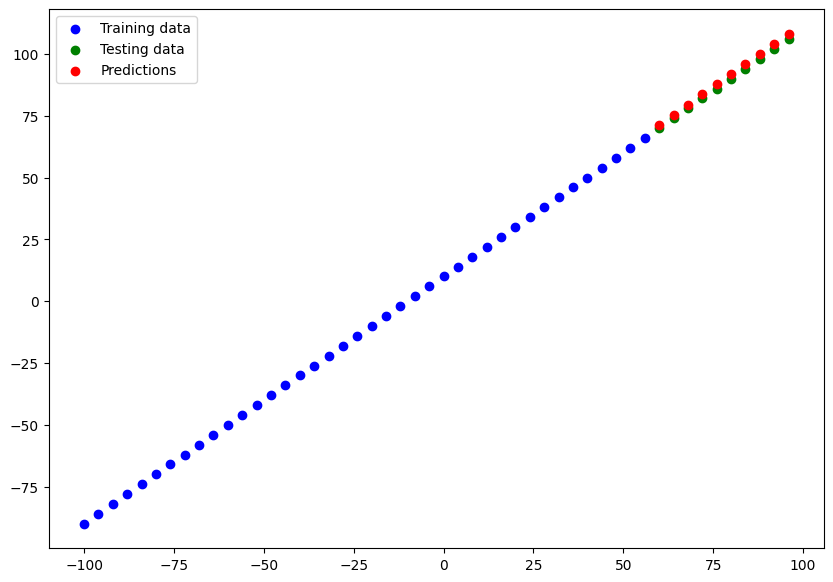

In [48]:
plot_predictions(train_data=X_train,
                 train_label=y_train,
                 test_data=X_test,
                 test_labels=y_test,
                 predictions=y_pred)

## Evaluating model's predictions with regression evaluation metrics

Depending on the problem you're working on, there will be different evaluation metrics to evaluate model's performance.

Since we're working on a regression, two of the main metrics:
* MAE - mean absolute error, "on average, how wrong is each of model's predictions"
* MSE - mean square error, "square the average errors"

In [51]:
# Evaluate the model on test
model.evaluate(X_test, y_test)

1/1 [==============================] - 0s 30ms/step - loss: 1.7444 - mae: 1.7444


[1.744409203529358, 1.744409203529358]

In [52]:
y_pred = tf.squeeze(tf.constant(y_pred))

In [53]:
# calculate the mean absolute error
tf.keras.losses.MAE(y_test, y_pred)

<tf.Tensor: shape=(), dtype=float32, numpy=1.7444099>

In [54]:
# Calulate the mean square error
tf.keras.losses.MSE(y_test,y_pred)

<tf.Tensor: shape=(), dtype=float32, numpy=3.1112106>

In [55]:
y_pred

<tf.Tensor: shape=(10,), dtype=float32, numpy=
array([ 71.33514 ,  75.42608 ,  79.51703 ,  83.60799 ,  87.69893 ,
        91.78989 ,  95.880844,  99.97178 , 104.062744, 108.15369 ],
      dtype=float32)>

In [57]:
# Trying huber
y_test = np.array([70, 74, 78, 82, 86, 90, 94, 98, 102, 106], dtype=np.float32)
y_pred = np.array([68.49052, 72.401596, 76.312675, 80.22375, 84.13483,
                   88.0459, 91.95697, 95.86805, 99.77911, 103.690186], dtype=np.float32)

huber_loss = tf.keras.losses.Huber()(y_test, y_pred).numpy()


In [58]:
# Make some function to reuse MAE and MSE
def mae(y_true, y_pred):
  return tf.metrics.mean_absolute_error(y_true=y_true, y_pred= tf.squeeze(y_pred))

def mse(y_true ,y_pred):
  return tf.metrics.mean_squared_error(y_true=y_true, y_pred =tf.squeeze(y_pred))


## Running experiments to improve our model

```
Build a model -> fit it -> evaluate it -> tweak it-> fit it-> evaluate it -> tweak it -> fit it -> evaluate it...
```

1. Get more data - get more examples for model to train on(more opportunites to learn pattterns or relationships between features and labels)

2. Make model larger(using a more complex model) - this might come in form of layers or more hidden units in each layer.

3. Traun for longer - give your model more of a chance to find pattern in the data.

In [59]:
X_train, y_train

(<tf.Tensor: shape=(40,), dtype=int32, numpy=
 array([-100,  -96,  -92,  -88,  -84,  -80,  -76,  -72,  -68,  -64,  -60,
         -56,  -52,  -48,  -44,  -40,  -36,  -32,  -28,  -24,  -20,  -16,
         -12,   -8,   -4,    0,    4,    8,   12,   16,   20,   24,   28,
          32,   36,   40,   44,   48,   52,   56], dtype=int32)>,
 <tf.Tensor: shape=(40,), dtype=int32, numpy=
 array([-90, -86, -82, -78, -74, -70, -66, -62, -58, -54, -50, -46, -42,
        -38, -34, -30, -26, -22, -18, -14, -10,  -6,  -2,   2,   6,  10,
         14,  18,  22,  26,  30,  34,  38,  42,  46,  50,  54,  58,  62,
         66], dtype=int32)>)

### Let's do 3 modelling experiments

1. `model_1` - same as the original model, 1 layer trained for 100epochs.
2. `model_2` - 2 layers, trained for 100 epochs
3. `model_3`-2 layers, trained for 500 epochs

> Building: `model_1`

In [40]:
# set random seed
tf.random.set_seed(42)

# 1. create the first layers
model_1 = tf.keras.Sequential([tf.keras.layers.Dense(1, name="model_1")])

# 2. compile the model
model_1.compile(loss ="mae",
              optimizer= tf.keras.optimizers.SGD(),
              metrics=["mae"])

# 3. fit the model
model_1.fit(tf.expand_dims(X_train, axis=1), y_train, epochs=100)

Epoch 1/100
2/2 [==============================] - 0s 16ms/step - loss: 22.2656 - mae: 22.2656
Epoch 2/100
2/2 [==============================] - 0s 9ms/step - loss: 11.3779 - mae: 11.3779
Epoch 3/100
2/2 [==============================] - 0s 13ms/step - loss: 15.6359 - mae: 15.6359
Epoch 4/100
2/2 [==============================] - 0s 10ms/step - loss: 8.2151 - mae: 8.2151
Epoch 5/100
2/2 [==============================] - 0s 10ms/step - loss: 10.6205 - mae: 10.6205
Epoch 6/100
2/2 [==============================] - 0s 11ms/step - loss: 9.8291 - mae: 9.8291
Epoch 7/100
2/2 [==============================] - 0s 9ms/step - loss: 8.9041 - mae: 8.9041
Epoch 8/100
2/2 [==============================] - 0s 9ms/step - loss: 9.0749 - mae: 9.0749
Epoch 9/100
2/2 [==============================] - 0s 9ms/step - loss: 19.5822 - mae: 19.5822
Epoch 10/100
2/2 [==============================] - 0s 10ms/step - loss: 10.5781 - mae: 10.5781
Epoch 11/100
2/2 [==============================] - 0s 8ms/st

1/1 [==============================] - 0s 28ms/step


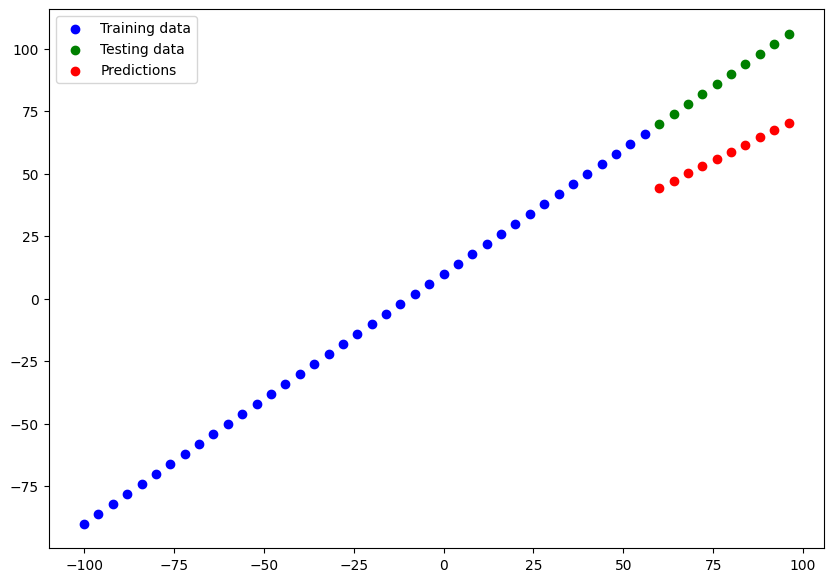

In [60]:
# Make a plot predcitions fro model_1
y_preds_1 = model_1.predict(X_test)
plot_predictions(predictions=y_preds_1)

In [61]:
#  Calculate evaluation 1 for metrics
mae_1= mae(y_test, y_preds_1)
mse_1 = mse(y_test, y_preds_1)
mae_1, mse_1

(<tf.Tensor: shape=(), dtype=float32, numpy=30.666113>,
 <tf.Tensor: shape=(), dtype=float32, numpy=950.884>)

> Building:  `model_2`
* 2 dense layers, trained for 100 epochs


In [62]:
# set the random seed
tf.random.set_seed(42)

# 1. creating model2
model_2 = tf.keras.Sequential([
    tf.keras.layers.Dense(100, name="input_layer"),
    tf.keras.layers.Dense(1, name="output_layer")], name="model_2")

# 2. compiling model
model_2.compile(loss=tf.keras.losses.mae,
                optimizer= tf.keras.optimizers.SGD(),
                metrics=["mse"])

# 3. fiting model

model_2.fit(tf.expand_dims(X_train, axis=1), y_train, epochs=100)


Epoch 1/100
2/2 [==============================] - 1s 18ms/step - loss: 46.3038 - mse: 3063.8635
Epoch 2/100
2/2 [==============================] - 0s 10ms/step - loss: 34.4593 - mse: 1671.3588
Epoch 3/100
2/2 [==============================] - 0s 9ms/step - loss: 39.0625 - mse: 2279.6462
Epoch 4/100
2/2 [==============================] - 0s 12ms/step - loss: 24.9822 - mse: 900.1688
Epoch 5/100
2/2 [==============================] - 0s 12ms/step - loss: 14.8117 - mse: 273.6351
Epoch 6/100
2/2 [==============================] - 0s 12ms/step - loss: 11.8081 - mse: 164.1879
Epoch 7/100
2/2 [==============================] - 0s 11ms/step - loss: 12.9025 - mse: 229.4560
Epoch 8/100
2/2 [==============================] - 0s 12ms/step - loss: 11.1310 - mse: 159.9659
Epoch 9/100
2/2 [==============================] - 0s 10ms/step - loss: 40.7141 - mse: 2618.0471
Epoch 10/100
2/2 [==============================] - 0s 12ms/step - loss: 28.0765 - mse: 1111.2019
Epoch 11/100
2/2 [=================

1/1 [==============================] - 0s 59ms/step


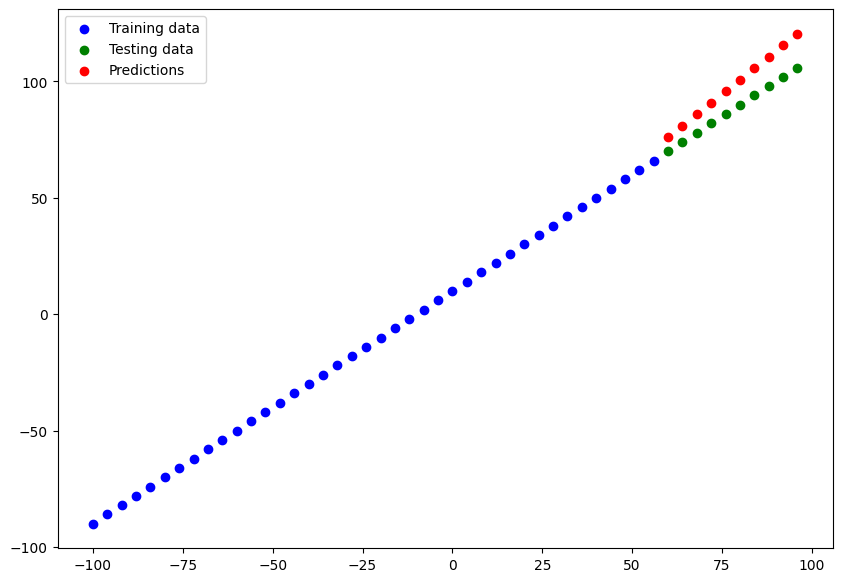

In [63]:
# Prediction and visualize
y_preds_2 = model_2.predict(X_test)
plot_predictions(predictions=y_preds_2)

In [64]:
# evaluate the metrics
mse_2 = mse(y_test, y_preds_2)
mae_2 = mae(y_test, y_preds_2)
mae_2, mse_2

(<tf.Tensor: shape=(), dtype=float32, numpy=10.224398>,
 <tf.Tensor: shape=(), dtype=float32, numpy=111.946884>)

> Building:  `model_3`
* 2 layers, trained for 500 epochs

In [65]:
# set random seed
tf.random.set_seed(42)

# 1. create model
model_3 = tf.keras.Sequential([
    tf.keras.layers.Dense(10, name="input_layer"),
    tf.keras.layers.Dense(1, name="output_layer")
],name="model_3")

# 2. compile model
model_3.compile(loss= tf.keras.losses.mae,
                optimizer= tf.keras.optimizers.SGD(),
                metrics=["mse"])

# 3. fit the model
model_3.fit(tf.expand_dims(X_train, axis=1), y_train, epochs=500)

Epoch 1/500
2/2 [==============================] - 0s 15ms/step - loss: 48.7957 - mse: 3619.4172
Epoch 2/500
2/2 [==============================] - 0s 8ms/step - loss: 27.0533 - mse: 947.5633
Epoch 3/500
2/2 [==============================] - 0s 8ms/step - loss: 31.2484 - mse: 1489.7321
Epoch 4/500
2/2 [==============================] - 0s 7ms/step - loss: 13.4270 - mse: 251.8436
Epoch 5/500
2/2 [==============================] - 0s 7ms/step - loss: 18.1231 - mse: 444.7637
Epoch 6/500
2/2 [==============================] - 0s 8ms/step - loss: 8.0192 - mse: 90.2822
Epoch 7/500
2/2 [==============================] - 0s 8ms/step - loss: 12.8508 - mse: 226.1817
Epoch 8/500
2/2 [==============================] - 0s 9ms/step - loss: 11.1385 - mse: 158.4064
Epoch 9/500
2/2 [==============================] - 0s 8ms/step - loss: 40.8449 - mse: 2635.1118
Epoch 10/500
2/2 [==============================] - 0s 9ms/step - loss: 28.1945 - mse: 1120.7385
Epoch 11/500
2/2 [============================

1/1 [==============================] - 0s 88ms/step


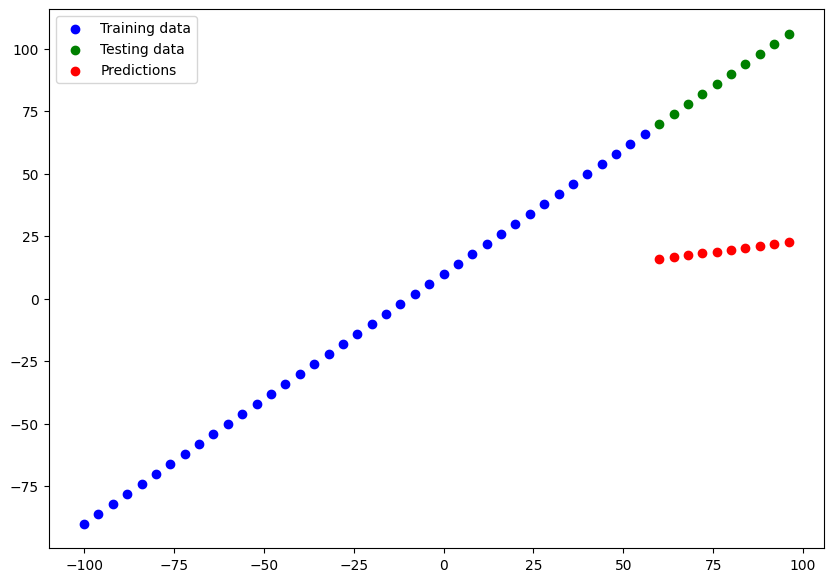

In [66]:
# visualize and predict
y_pred_3 = model_3.predict(X_test)
plot_predictions(predictions= y_pred_3)

In [67]:
# evaluate
mae_3 = mae(y_test, y_pred_3)
mse_3 = mse(y_test, y_pred_3)
mse_3, mae_3

(<tf.Tensor: shape=(), dtype=float32, numpy=4807.7407>,
 <tf.Tensor: shape=(), dtype=float32, numpy=68.71067>)

### Comparing results of experiments


In [68]:
# Let's compare model's results using a pandas dataframe

import pandas as pd

model_results= [["model_1", mae_1.numpy(), mse_1.numpy()],
                ["model_2", mae_2.numpy(), mse_2.numpy()],
                ["model_3", mae_3.numpy(), mse_3.numpy()]]

all_results = pd.DataFrame(model_results, columns=["model", "mae", "mse"])
all_results

,model,mae,mse
0,model_1,30.666113,950.883972
1,model_2,10.224398,111.946884
2,model_3,68.710670,4807.740723


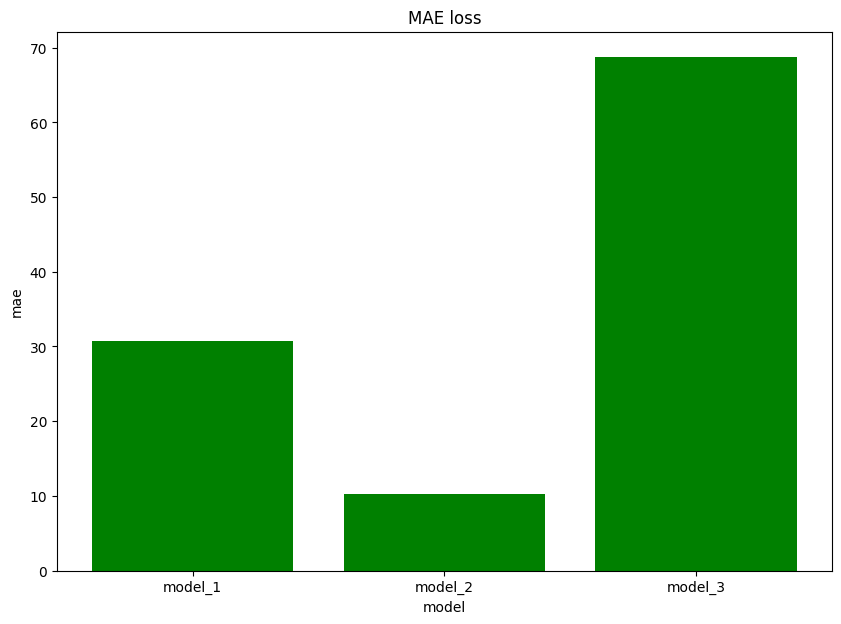

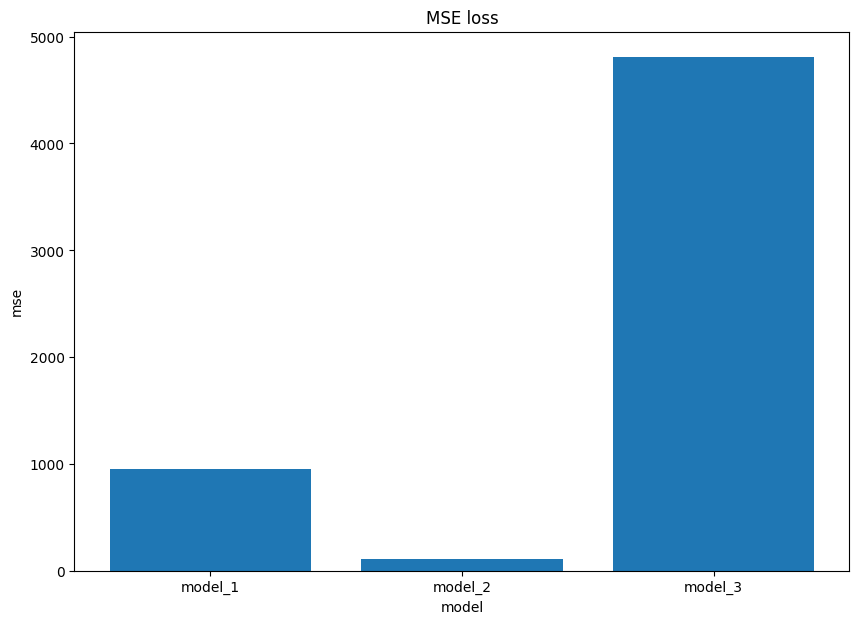

In [80]:
import matplotlib.pyplot as plt

# Create the figure
plt.figure(figsize=(10,7))

plt.bar(all_results["model"], all_results["mae"], color="green")
plt.xlabel("model")
plt.ylabel("mae")
plt.title("MAE loss")

plt.figure(figsize=(10,7))

plt.bar(all_results["model"], all_results["mse"])
plt.xlabel("model")
plt.ylabel("mse")
plt.title("MSE loss")

plt.show();

In [81]:
model_2.summary()

Model: "model_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_layer (Dense)         (None, 100)               200       
                                                                 
 output_layer (Dense)        (None, 1)                 101       
                                                                 
Total params: 301 (1.18 KB)
Trainable params: 301 (1.18 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


> Looks like `model_2` performed best

## Tracking experiments

One really good habit in machine learning modelling is to track the results of your experiments.

And when doing so, it can be tedious if you're running lots of experiments.

Luckily, there are tools to help us!

**Resources** :
    * TensorBoard - a component of the tensorflow library to help track modelling experiments.
    * Weights & Biases - a tool for tracking all of kinds of machine learning experiments(plugs straight into TensorBoard).


## Saving models

Saving our models allows us to use then outside of Google colab(or wherever they were trained) such as in a web application of mobile app.

There are two main formats to save a model's too:

1. The SavedModel format
2. The HDF5 format

In [82]:
# save model using the SavedModel format
model_2.save("best_model__SavedModel_format")

In [83]:
#  save model using HDF5 format
model_2.save("best_model_HDF5_format.h5")

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3000: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


## Loading the saved model


In [84]:
# loading the saved format model
new_model= tf.keras.models.load_model("/content/best_model__SavedModel_format")
new_model.summary()

Model: "model_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_layer (Dense)         (None, 100)               200       
                                                                 
 output_layer (Dense)        (None, 1)                 101       
                                                                 
Total params: 301 (1.18 KB)
Trainable params: 301 (1.18 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [85]:
# load the h5 format
tf.keras.models.load_model("best_model_HDF5_format.h5").summary()

Model: "model_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_layer (Dense)         (None, 100)               200       
                                                                 
 output_layer (Dense)        (None, 1)                 101       
                                                                 
Total params: 301 (1.18 KB)
Trainable params: 301 (1.18 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [86]:
model_2.summary()

Model: "model_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_layer (Dense)         (None, 100)               200       
                                                                 
 output_layer (Dense)        (None, 1)                 101       
                                                                 
Total params: 301 (1.18 KB)
Trainable params: 301 (1.18 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


## A larger example


A larger example
Alright, we've seen the fundamentals of building neural network regression models in TensorFlow.

Let's step it up a notch and build a model for a more feature rich dataset.

More specifically we're going to try predict the cost of medical insurance for individuals based on a number of different parameters such as, `age`, `sex`, `bmi`, `children`, `smoking_status` and `residential_region`.

### Become one with data

In [87]:
# Import required libraries
import tensorflow as tf
import pandas as pd
import matplotlib.pyplot as plt


In [91]:
# Read in the insurance
insurance = pd.read_csv("https://raw.githubusercontent.com/stedy/Machine-Learning-with-R-datasets/master/insurance.csv")
insurance

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520
...,...,...,...,...,...,...,...
1333,50,male,30.970,3,no,northwest,10600.54830
1334,18,female,31.920,0,no,northeast,2205.98080
1335,18,female,36.850,0,no,southeast,1629.83350
1336,21,female,25.800,0,no,southwest,2007.94500


In [92]:
# check dataset
insurance.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


In [94]:
# Onehot encode dataframe
insurance_one_hot_encode= pd.get_dummies(insurance)
insurance_one_hot_encode.head()

,age,bmi,children,charges,sex_female,sex_male,smoker_no,smoker_yes,region_northeast,region_northwest,region_southeast,region_southwest
0,19,27.900,0,16884.92400,1,0,0,1,0,0,0,1
1,18,33.770,1,1725.55230,0,1,1,0,0,0,1,0
2,28,33.000,3,4449.46200,0,1,1,0,0,0,1,0
3,33,22.705,0,21984.47061,0,1,1,0,0,1,0,0
4,32,28.880,0,3866.85520,0,1,1,0,0,1,0,0


In [96]:
# Create X and y values (features and labels)
# Create training and test sets and build a neural network(sort of like model_2 above)
X = insurance_one_hot_encode.drop("charges", axis=1)
y = insurance_one_hot_encode["charges"]

In [97]:
# View features
X.head()

,age,bmi,children,sex_female,sex_male,smoker_no,smoker_yes,region_northeast,region_northwest,region_southeast,region_southwest
0,19,27.900,0,1,0,0,1,0,0,0,1
1,18,33.770,1,0,1,1,0,0,0,1,0
2,28,33.000,3,0,1,1,0,0,0,1,0
3,33,22.705,0,0,1,1,0,0,1,0,0
4,32,28.880,0,0,1,1,0,0,1,0,0


### Splitting the data and building the model

In [98]:
# splitting data
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [99]:
from keras.callbacks import EarlyStopping

# set random seed
tf.random.set_seed(42)

# 1. create a model
insurance_model = tf.keras.Sequential([
    tf.keras.layers.Dense(100),
    tf.keras.layers.Dense(1)
], name="insurance_model")

# 2 complile the model
insurance_model.compile(loss=tf.keras.losses.mae
                        , optimizer= tf.keras.optimizers.legacy.Adam(learning_rate=0.01),
                        metrics=["mae"])
# 3. early stopping
early_stopping = EarlyStopping(monitor ="loss", patience=8)

# 4. fit the model
history = insurance_model.fit(X_train, y_train, epochs=1000, callbacks=[early_stopping])

Epoch 1/1000
34/34 [==============================] - 1s 2ms/step - loss: 12943.5928 - mae: 12943.5928
Epoch 2/1000
34/34 [==============================] - 0s 2ms/step - loss: 10506.7422 - mae: 10506.7422
Epoch 3/1000
34/34 [==============================] - 0s 2ms/step - loss: 7669.1104 - mae: 7669.1104
Epoch 4/1000
34/34 [==============================] - 0s 2ms/step - loss: 7429.2988 - mae: 7429.2988
Epoch 5/1000
34/34 [==============================] - 0s 2ms/step - loss: 7352.2515 - mae: 7352.2515
Epoch 6/1000
34/34 [==============================] - 0s 3ms/step - loss: 7286.9312 - mae: 7286.9312
Epoch 7/1000
34/34 [==============================] - 0s 2ms/step - loss: 7200.7354 - mae: 7200.7354
Epoch 8/1000
34/34 [==============================] - 0s 2ms/step - loss: 7122.7080 - mae: 7122.7080
Epoch 9/1000
34/34 [==============================] - 0s 3ms/step - loss: 7037.9307 - mae: 7037.9307
Epoch 10/1000
34/34 [==============================] - 0s 2ms/step - loss: 6950.5171 - 

Text(0.5, 0, 'epochs')

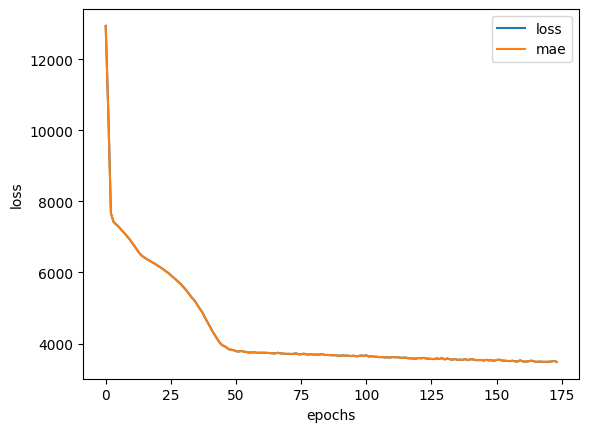

In [100]:
# lets check history plotting loss curve
pd.DataFrame(history.history).plot()
plt.ylabel("loss")
plt.xlabel("epochs")

### Preprocessing the data(normalization and standardization)

In terms of scaling values, neural networks tend to prefer normalization.

If not sure on which to use, try both and see which one performs better

In [101]:
import pandas as pd
import matplotlib.pyplot as plt
import tensorflow as tf

# read data
insurance= pd.read_csv("https://raw.githubusercontent.com/stedy/Machine-Learning-with-R-datasets/master/insurance.csv")
insurance

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520
...,...,...,...,...,...,...,...
1333,50,male,30.970,3,no,northwest,10600.54830
1334,18,female,31.920,0,no,northeast,2205.98080
1335,18,female,36.850,0,no,southeast,1629.83350
1336,21,female,25.800,0,no,southwest,2007.94500


To prepare data borrow a few classes from Scikit-learn

In [102]:
from sklearn.compose import make_column_transformer
from sklearn.preprocessing import MinMaxScaler, OneHotEncoder
from sklearn.model_selection import train_test_split

# create a column transformer

ct = make_column_transformer(
    (MinMaxScaler(), ["age", "bmi", "children"]), #turn all values between 0 and 1
    (OneHotEncoder(handle_unknown="ignore"), ["sex", "smoker", "region"]))

# create X and y
X= insurance.drop("charges", axis=1)
y= insurance["charges"]

# Build out train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y , test_size= 0.2, random_state=42)

# fit the column transormer to our training data
ct.fit(X_train)

# transform training and test data with normalization (MinMaxScaler) and OneHotEncoder
X_train_normal = ct.transform(X_train)
X_test_normal = ct.transform(X_test)

In [103]:
# view data
X_train.loc[0], X_train.loc[1]

(age                19
 sex            female
 bmi              27.9
 children            0
 smoker            yes
 region      southwest
 Name: 0, dtype: object,
 age                18
 sex              male
 bmi             33.77
 children            1
 smoker             no
 region      southeast
 Name: 1, dtype: object)

In [104]:
X_train_normal

array([[0.60869565, 0.10734463, 0.4       , ..., 1.        , 0.        ,
        0.        ],
       [0.63043478, 0.22491256, 0.        , ..., 0.        , 0.        ,
        0.        ],
       [0.73913043, 0.23944041, 0.        , ..., 0.        , 1.        ,
        0.        ],
       ...,
       [0.86956522, 0.24791499, 0.        , ..., 0.        , 0.        ,
        0.        ],
       [0.41304348, 0.85122411, 0.4       , ..., 0.        , 0.        ,
        1.        ],
       [0.80434783, 0.37503363, 0.        , ..., 0.        , 0.        ,
        1.        ]])

In [105]:
X_train.shape , X_train_normal.shape

((1070, 6), (1070, 11))

### Train model

In [106]:
# Build a neural network model to fit on our normalized
tf.random.set_seed(42)

# 1. create model-1
insurance_model_1 = tf.keras.Sequential([
    tf.keras.layers.Dense(100),
    tf.keras.layers.Dense(1)
])

# 2. compile model
insurance_model_1.compile(
    loss= tf.keras.losses.mae,
    optimizer= tf.keras.optimizers.SGD(),
    metrics=["mae"])

# 3. fit model
history1 = insurance_model_1.fit(X_train_normal, y_train, epochs=100)

Epoch 1/100
34/34 [==============================] - 1s 2ms/step - loss: 13344.3770 - mae: 13344.3770
Epoch 2/100
34/34 [==============================] - 0s 3ms/step - loss: 13338.6445 - mae: 13338.6445
Epoch 3/100
34/34 [==============================] - 0s 3ms/step - loss: 13322.9561 - mae: 13322.9561
Epoch 4/100
34/34 [==============================] - 0s 3ms/step - loss: 13275.1982 - mae: 13275.1982
Epoch 5/100
34/34 [==============================] - 0s 3ms/step - loss: 13127.3799 - mae: 13127.3799
Epoch 6/100
34/34 [==============================] - 0s 3ms/step - loss: 12666.8389 - mae: 12666.8389
Epoch 7/100
34/34 [==============================] - 0s 2ms/step - loss: 11390.0264 - mae: 11390.0264
Epoch 8/100
34/34 [==============================] - 0s 2ms/step - loss: 9609.3301 - mae: 9609.3301
Epoch 9/100
34/34 [==============================] - 0s 2ms/step - loss: 8521.0156 - mae: 8521.0156
Epoch 10/100
34/34 [==============================] - 0s 2ms/step - loss: 8128.1484 - 

In [107]:
# random seed
tf.random.set_seed(42)

# create model
insurance_model_2 = tf.keras.Sequential([
    tf.keras.layers.Dense(100),
    tf.keras.layers.Dense(10),
    tf.keras.layers.Dense(1)
])

# compile the model
insurance_model_2.compile(
    loss=tf.keras.losses.mae,
    optimizer= tf.keras.optimizers.legacy.Adam(learning_rate=0.1),
    metrics=["mae"]
)

# callback soon
early_stopping = tf.keras.callbacks.EarlyStopping(monitor="loss", patience=10)

# fit the model
history = insurance_model_2.fit(X_train_normal, y_train, epochs=700, callbacks=[early_stopping])

Epoch 1/700
34/34 [==============================] - 1s 3ms/step - loss: 9166.9248 - mae: 9166.9248
Epoch 2/700
34/34 [==============================] - 0s 3ms/step - loss: 4598.4385 - mae: 4598.4385
Epoch 3/700
34/34 [==============================] - 0s 2ms/step - loss: 3780.0747 - mae: 3780.0747
Epoch 4/700
34/34 [==============================] - 0s 3ms/step - loss: 3664.5371 - mae: 3664.5371
Epoch 5/700
34/34 [==============================] - 0s 3ms/step - loss: 3608.9214 - mae: 3608.9214
Epoch 6/700
34/34 [==============================] - 0s 3ms/step - loss: 3686.6531 - mae: 3686.6531
Epoch 7/700
34/34 [==============================] - 0s 2ms/step - loss: 3675.3477 - mae: 3675.3477
Epoch 8/700
34/34 [==============================] - 0s 2ms/step - loss: 3626.3213 - mae: 3626.3213
Epoch 9/700
34/34 [==============================] - 0s 2ms/step - loss: 3642.0947 - mae: 3642.0947
Epoch 10/700
34/34 [==============================] - 0s 2ms/step - loss: 3566.4326 - mae: 3566.4326

### Plot models results

Text(0.5, 0, 'epochs')

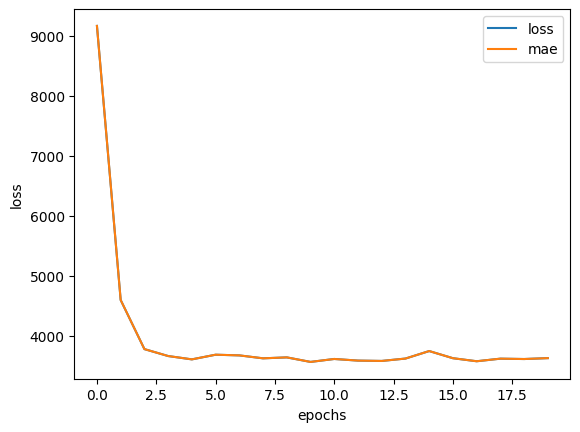

In [108]:
# viewing learning of both models
import pandas as pd
pd.DataFrame(history.history).plot()
pd.DataFrame(history1.history)
plt.ylabel("loss")
plt.xlabel("epochs")

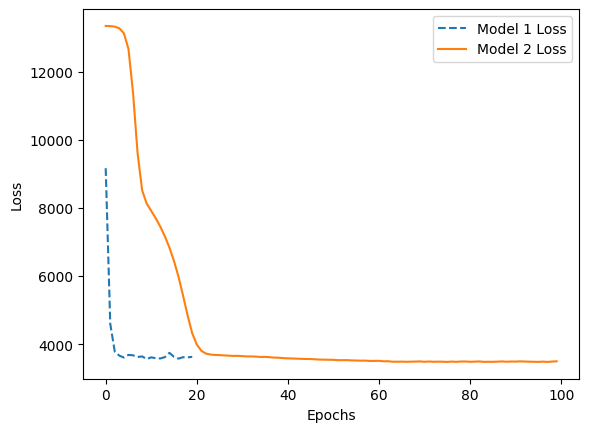

In [111]:
# Plot the loss from history
plt.plot(history.history['loss'], label='Model 1 Loss', linestyle='--')

# Plot the loss from history1
plt.plot(history1.history['loss'], label='Model 2 Loss', linestyle='-')

# Add labels and a legend
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

# Show the plot
plt.show()

In [112]:
# Evaulate  model 1
insurance_model_1.evaluate(X_test_normal, y_test)

9/9 [==============================] - 0s 4ms/step - loss: 3165.7776 - mae: 3165.7776


[3165.777587890625, 3165.777587890625]

In [113]:
# Evaulate  model 2
insurance_model_2.evaluate(X_test_normal, y_test)

9/9 [==============================] - 0s 3ms/step - loss: 3407.4307 - mae: 3407.4307


[3407.4306640625, 3407.4306640625]

From this we can see normalizing the data results in 10% less error using the same model than not normalizing the data.

This is one of the main benefits of **normalization: faster convergence time (a fancy way of saying, your model gets to better results faster).**

insurance_model_2 may have eventually achieved the same results as insurance_model_3 if we left it training for longer.

Also, the results may change if we were to alter the architectures of the models, e.g. more hidden units per layer or more layers.

But since our main goal as neural network practitioners is to decrease the time between experiments, anything that helps us get better results sooner is a plus.